## Monk1 

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder
import numpy as np

X, y = fetch_openml('monks-problems-1', return_X_y=True)
y = y.astype(np.float32)

Xtrain = OneHotEncoder(sparse=False).fit_transform(X[:124,:])
Xtest = OneHotEncoder(sparse=False).fit_transform(X[124:,:])
ytrain, ytest = y[:124], y[124:]

In [2]:
import numpy as np

from wavegrad.network import Sequential
from wavegrad.layers import LayerDense
from wavegrad.activations import *
from wavegrad.losses import MSE
from wavegrad.optimizers import *

# network
net = Sequential()
net.add(LayerDense(17, 5, sigmoid))
net.add(LayerDense(5, 1, tanh))
optim = GD(net.layers, lr=0.01, momentum=0.6)
# train
net.use(MSE)
net.fit(Xtrain, ytrain, epochs=500, optimizer=optim)

# test
out = net.predict(Xtrain)

epoch 500/500   error=0.00    accuracy=1.00: 100%|██████████| 500/500 [00:05<00:00, 94.53it/s]


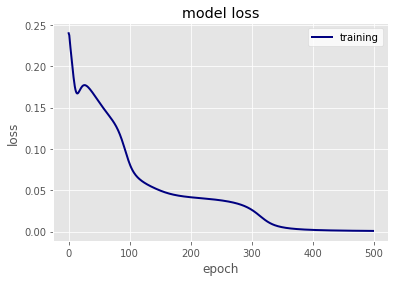

In [3]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

fig, loss = plt.subplots()
loss.plot(net.train_loss_history, color='navy', lw=2)
loss.set_title('model loss')
loss.set_xlabel('epoch')
loss.set_ylabel('loss')
loss.legend(['training', 'validation']).get_frame().set_facecolor('white')
plt.show()

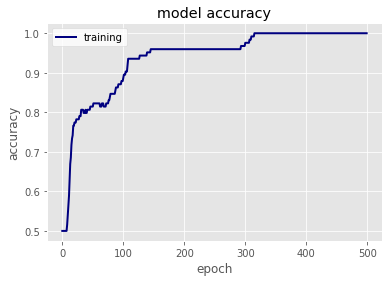

In [4]:
plt.style.use('ggplot')

fig, loss = plt.subplots()
loss.plot(net.val_accuracy_history, color='navy', lw=2)
loss.set_title('model accuracy')
loss.set_xlabel('epoch')
loss.set_ylabel('accuracy')
loss.legend(['training', 'validation']).get_frame().set_facecolor('white')
plt.show()

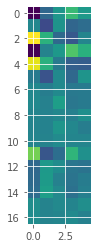

In [5]:
plt.imshow(net.layers[0].weights)

# Tensorflow model to compare with mine

In [6]:
import tensorflow as tf
from tensorflow import keras

In [7]:
model = keras.Sequential([
    keras.Input(shape=(17,)),
    keras.layers.Dense(units=5, activation='sigmoid'),
    keras.layers.Dense(units=1, activation='tanh')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 90        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 96
Trainable params: 96
Non-trainable params: 0
_________________________________________________________________


The problem here is that Tensorflow don't have the Gradient Descent methos, but only the SGD so i have to implement it to compare the two networks

In [9]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9), 
              loss=tf.losses.mean_squared_error,
              metrics=['accuracy'])

In [10]:
history = model.fit(
    Xtrain ,ytrain, epochs=500, batch_size=len(Xtrain)
)

Epoch 1/500
1/1 [==============================] - 0s 1ms/step - loss: 0.5425 - accuracy: 0.5000
Epoch 2/500
1/1 [==============================] - 0s 722us/step - loss: 0.5182 - accuracy: 0.5000
Epoch 3/500
1/1 [==============================] - 0s 724us/step - loss: 0.4757 - accuracy: 0.5000
Epoch 4/500
1/1 [==============================] - 0s 615us/step - loss: 0.4233 - accuracy: 0.5000
Epoch 5/500
1/1 [==============================] - 0s 504us/step - loss: 0.3696 - accuracy: 0.5000
Epoch 6/500
1/1 [==============================] - 0s 6ms/step - loss: 0.3222 - accuracy: 0.5000
Epoch 7/500
1/1 [==============================] - 0s 872us/step - loss: 0.2857 - accuracy: 0.5000
Epoch 8/500
1/1 [==============================] - 0s 746us/step - loss: 0.2615 - accuracy: 0.5000
Epoch 9/500
1/1 [==============================] - 0s 2ms/step - loss: 0.2484 - accuracy: 0.5323
Epoch 10/500
1/1 [==============================] - 0s 646us/step - loss: 0.2439 - accuracy: 0.5645
Epoch 11/500
1/

1/1 [==============================] - 0s 947us/step - loss: 0.2283 - accuracy: 0.6855
Epoch 84/500
1/1 [==============================] - 0s 844us/step - loss: 0.2281 - accuracy: 0.7016
Epoch 85/500
1/1 [==============================] - 0s 910us/step - loss: 0.2279 - accuracy: 0.7016
Epoch 86/500
1/1 [==============================] - 0s 827us/step - loss: 0.2276 - accuracy: 0.7016
Epoch 87/500
1/1 [==============================] - 0s 1ms/step - loss: 0.2274 - accuracy: 0.7016
Epoch 88/500
1/1 [==============================] - 0s 692us/step - loss: 0.2271 - accuracy: 0.7016
Epoch 89/500
1/1 [==============================] - 0s 605us/step - loss: 0.2269 - accuracy: 0.7016
Epoch 90/500
1/1 [==============================] - 0s 803us/step - loss: 0.2267 - accuracy: 0.6935
Epoch 91/500
1/1 [==============================] - 0s 2ms/step - loss: 0.2264 - accuracy: 0.6935
Epoch 92/500
1/1 [==============================] - 0s 627us/step - loss: 0.2262 - accuracy: 0.6935
Epoch 93/500
1/1 

1/1 [==============================] - 0s 655us/step - loss: 0.2078 - accuracy: 0.7016
Epoch 165/500
1/1 [==============================] - 0s 862us/step - loss: 0.2076 - accuracy: 0.7016
Epoch 166/500
1/1 [==============================] - 0s 646us/step - loss: 0.2073 - accuracy: 0.7016
Epoch 167/500
1/1 [==============================] - 0s 633us/step - loss: 0.2070 - accuracy: 0.6935
Epoch 168/500
1/1 [==============================] - 0s 685us/step - loss: 0.2068 - accuracy: 0.6935
Epoch 169/500
1/1 [==============================] - 0s 590us/step - loss: 0.2065 - accuracy: 0.6935
Epoch 170/500
1/1 [==============================] - 0s 841us/step - loss: 0.2062 - accuracy: 0.6935
Epoch 171/500
1/1 [==============================] - 0s 626us/step - loss: 0.2060 - accuracy: 0.6935
Epoch 172/500
1/1 [==============================] - 0s 710us/step - loss: 0.2057 - accuracy: 0.6935
Epoch 173/500
1/1 [==============================] - 0s 643us/step - loss: 0.2054 - accuracy: 0.6935
Epoc

1/1 [==============================] - 0s 791us/step - loss: 0.1868 - accuracy: 0.7339
Epoch 246/500
1/1 [==============================] - 0s 684us/step - loss: 0.1866 - accuracy: 0.7339
Epoch 247/500
1/1 [==============================] - 0s 646us/step - loss: 0.1864 - accuracy: 0.7339
Epoch 248/500
1/1 [==============================] - 0s 705us/step - loss: 0.1861 - accuracy: 0.7339
Epoch 249/500
1/1 [==============================] - 0s 997us/step - loss: 0.1859 - accuracy: 0.7339
Epoch 250/500
1/1 [==============================] - 0s 1ms/step - loss: 0.1857 - accuracy: 0.7339
Epoch 251/500
1/1 [==============================] - 0s 625us/step - loss: 0.1854 - accuracy: 0.7339
Epoch 252/500
1/1 [==============================] - 0s 1ms/step - loss: 0.1852 - accuracy: 0.7339
Epoch 253/500
1/1 [==============================] - 0s 580us/step - loss: 0.1850 - accuracy: 0.7339
Epoch 254/500
1/1 [==============================] - 0s 1ms/step - loss: 0.1847 - accuracy: 0.7339
Epoch 255/

1/1 [==============================] - 0s 3ms/step - loss: 0.1710 - accuracy: 0.7581
Epoch 327/500
1/1 [==============================] - 0s 718us/step - loss: 0.1709 - accuracy: 0.7581
Epoch 328/500
1/1 [==============================] - 0s 611us/step - loss: 0.1707 - accuracy: 0.7581
Epoch 329/500
1/1 [==============================] - 0s 638us/step - loss: 0.1706 - accuracy: 0.7581
Epoch 330/500
1/1 [==============================] - 0s 732us/step - loss: 0.1705 - accuracy: 0.7581
Epoch 331/500
1/1 [==============================] - 0s 2ms/step - loss: 0.1703 - accuracy: 0.7581
Epoch 332/500
1/1 [==============================] - 0s 2ms/step - loss: 0.1702 - accuracy: 0.7581
Epoch 333/500
1/1 [==============================] - 0s 743us/step - loss: 0.1700 - accuracy: 0.7500
Epoch 334/500
1/1 [==============================] - 0s 675us/step - loss: 0.1699 - accuracy: 0.7500
Epoch 335/500
1/1 [==============================] - 0s 2ms/step - loss: 0.1697 - accuracy: 0.7500
Epoch 336/50

1/1 [==============================] - 0s 646us/step - loss: 0.1622 - accuracy: 0.7742
Epoch 408/500
1/1 [==============================] - 0s 699us/step - loss: 0.1621 - accuracy: 0.7742
Epoch 409/500
1/1 [==============================] - 0s 2ms/step - loss: 0.1620 - accuracy: 0.7742
Epoch 410/500
1/1 [==============================] - 0s 849us/step - loss: 0.1619 - accuracy: 0.7742
Epoch 411/500
1/1 [==============================] - 0s 1ms/step - loss: 0.1619 - accuracy: 0.7742
Epoch 412/500
1/1 [==============================] - 0s 624us/step - loss: 0.1618 - accuracy: 0.7742
Epoch 413/500
1/1 [==============================] - 0s 595us/step - loss: 0.1617 - accuracy: 0.7742
Epoch 414/500
1/1 [==============================] - 0s 556us/step - loss: 0.1617 - accuracy: 0.7742
Epoch 415/500
1/1 [==============================] - 0s 870us/step - loss: 0.1616 - accuracy: 0.7742
Epoch 416/500
1/1 [==============================] - 0s 861us/step - loss: 0.1615 - accuracy: 0.7742
Epoch 41

1/1 [==============================] - 0s 565us/step - loss: 0.1577 - accuracy: 0.7984
Epoch 489/500
1/1 [==============================] - 0s 680us/step - loss: 0.1576 - accuracy: 0.7984
Epoch 490/500
1/1 [==============================] - 0s 634us/step - loss: 0.1576 - accuracy: 0.7984
Epoch 491/500
1/1 [==============================] - 0s 680us/step - loss: 0.1576 - accuracy: 0.7984
Epoch 492/500
1/1 [==============================] - 0s 623us/step - loss: 0.1575 - accuracy: 0.7984
Epoch 493/500
1/1 [==============================] - 0s 593us/step - loss: 0.1575 - accuracy: 0.7984
Epoch 494/500
1/1 [==============================] - 0s 583us/step - loss: 0.1575 - accuracy: 0.7984
Epoch 495/500
1/1 [==============================] - 0s 993us/step - loss: 0.1574 - accuracy: 0.7984
Epoch 496/500
1/1 [==============================] - 0s 1ms/step - loss: 0.1574 - accuracy: 0.7984
Epoch 497/500
1/1 [==============================] - 0s 631us/step - loss: 0.1573 - accuracy: 0.7984
Epoch 

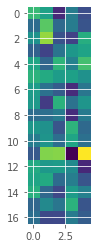

In [11]:
plt.imshow(model.layers[0].get_weights()[0])

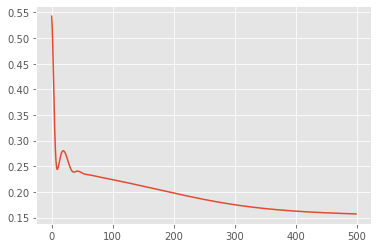

In [12]:
plt.plot(history.history['loss'])

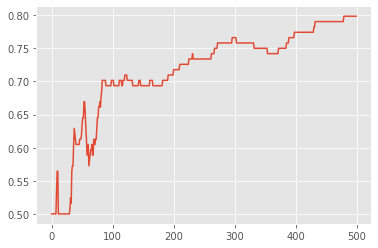

In [13]:
plt.plot(history.history['accuracy'])